In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('S02-hw-dataset.csv')
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [117]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [118]:
data['user_id'].isna().mean()

np.float64(0.0)

In [119]:
data['age'].isna().mean() # есть пропуски

np.float64(0.04878048780487805)

In [120]:
data['country'].isna().mean()

np.float64(0.0)

In [121]:
data['purchases'].isna().mean()

np.float64(0.0)

In [122]:
data['revenue'].isna().mean()

np.float64(0.0)

In [123]:
for line_index, i in enumerate(data.duplicated()): # выводим индексы дублирующих строк
    if i:
        print(line_index)

40


In [124]:
for i in range(len(data)):
    if data['purchases'][i] < 0 or data['revenue'][i] < 0:
        print(i) # индексы строк, в которых отрицательное число покупок или доход

5


In [125]:
for i in range(len(data)):
    if data['age'][i] < 0 or data['age'][i] > 100:
        print(i) # индексы строк, в которых возраст < 0 или > 100

5


In [126]:
for i in range(len(data)):
    if data['purchases'][i] > 0 and data['revenue'][i] == 0:
        print(i) # индексы строк с нулевым доходом при ненулевых количествах

10


При анализе данных были обнаружень проблемы полноты (отстутствие значений возраста в некоторых полях), уникальности (дублируется строка с индексом 40), достоверности (присутствуют аномальные значения)

In [127]:
data['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [128]:
data.groupby('country').mean() # среднее по околичественным признакам для каждой страны

,user_id,age,purchases,revenue
country,,,,
CN,10.000000,24.000000,4.500000,1054.000000
DE,24.666667,34.600000,6.500000,1445.500000
FR,20.666667,46.250000,4.250000,675.916667
RU,18.076923,30.076923,4.769231,790.076923
US,22.375000,36.714286,4.625000,557.375000


В ходе анализа было выявлено, что преобладают пользователи из стран RU и FR, а меньше всего пользователей из CN. В DE средняя прибыль и среднее число покупок больше всего. Наименьшая средняя прибыль - US, наименьшее среднее число покупок - FR. Наибольший средний возраст пользователей FR, наименьший - CN.

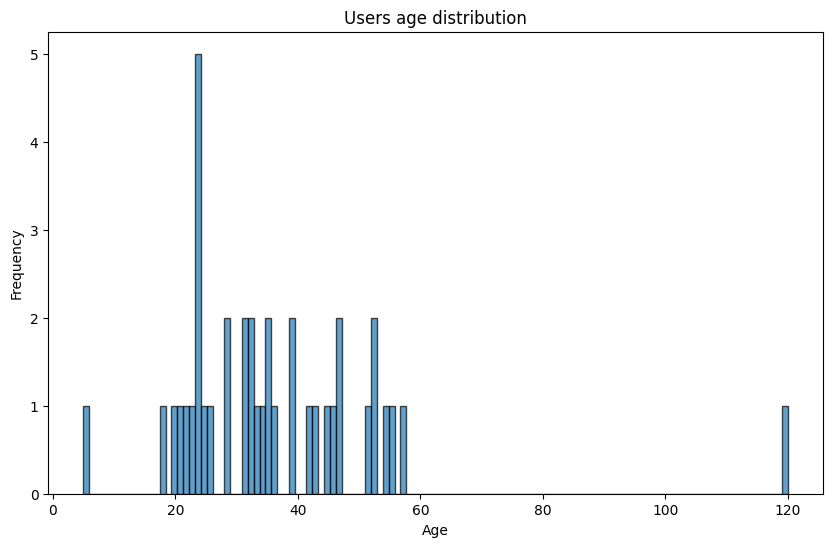

In [137]:
fig, ax = plt.subplots(figsize=(10, 6)) # Распределение возраста пользователей
ax.hist(data['age'], bins=120, alpha=0.7, edgecolor='black') # число корзин выбираем по макимальному значению возраста
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Users age distribution')
plt.savefig("figures/graph1.png")
plt.show()

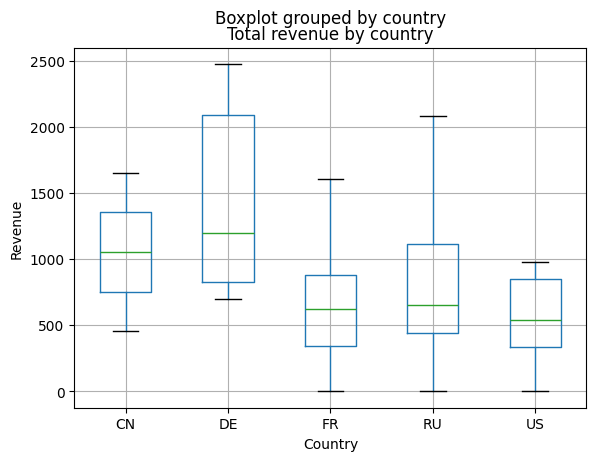

In [130]:
fig, ax = plt.subplots() # Суммарная выручка по странам
data.boxplot(column='revenue', by='country', ax=ax)
ax.set_title("Total revenue by country")
ax.set_xlabel("Country")
ax.set_ylabel("Revenue")
plt.savefig("figures/graph2.png")
plt.show()

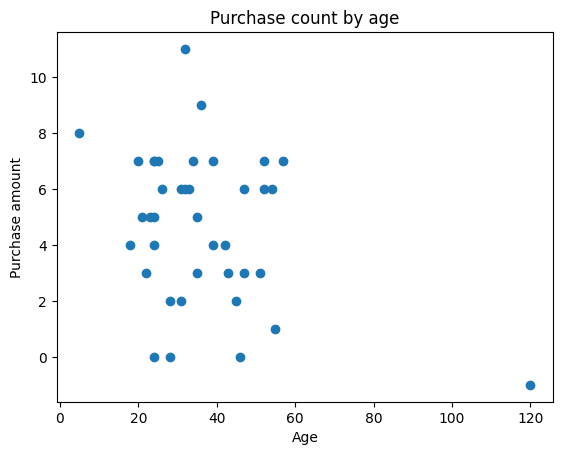

In [131]:
fig, ax = plt.subplots() # зависимость числа покупок от возраста пользователя
ax.scatter(data['age'], data['purchases'])
ax.set_title("Purchase count by age")
ax.set_xlabel("Age")
ax.set_ylabel("Purchase amount")
plt.savefig("figures/graph3.png")
plt.show()